In [112]:
#fetch data you will make analysis for
import pandas as pd
concrete_data =pd.read_csv('\Downloads\data\concrete_data.csv') 
concrete_data.head(7)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70


In [15]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [43]:
#describe some statistic of data to see it's distribution
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


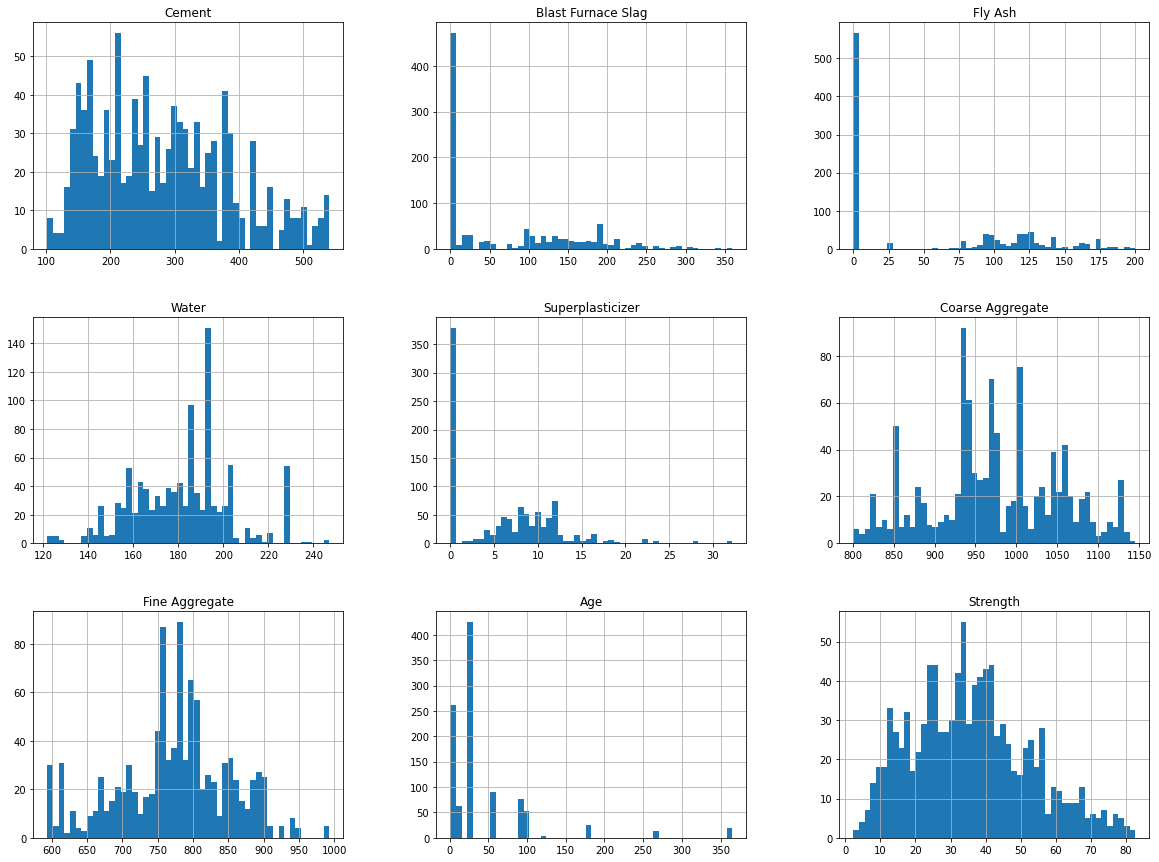

In [65]:
#showing distribution of all data 
concrete_data.hist(bins=50 , figsize= (20,15))
plt.show()

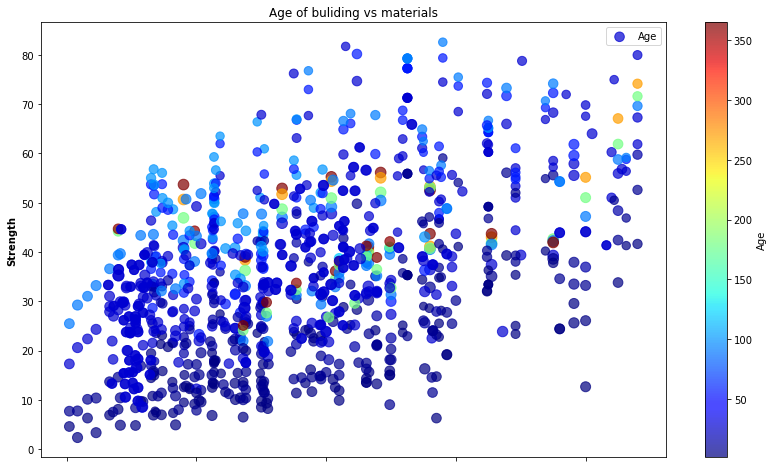

In [110]:
# test impact of increase amount of water into concrete strenght 
#we use four dimention for this plot which is
'''
1- Age of this concrete represendted by color bar 
2- concentration of the water in the strenght concrete
3- Distribution of cemant relative to --
4-strength of concrete 

'''
import matplotlib.pyplot as plt
concrete_data.plot(kind = 'scatter',x = "Cement" , y = "Strength",alpha = 0.7,
                  s=concrete_data["Water"]/2,label = "Age" ,figsize = (14,8),
                    c =  "Age",cmap=plt.get_cmap("jet"), colorbar=True,)
plt.ylabel("Strength",fontweight = 600)
plt.xlabel("Cemant")
plt.title("Age of buliding vs materials")
plt.legend()

In [113]:
#check if missing data 
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [ ]:
#split data into train and test for better model evaluation 

In [41]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = .2, random_state=42)

In [126]:
#train predictor for both x_train, x_test
X_train_norm = (X_train - X_train.mean()) / X_train.std()
X_test_norm = (X_test - X_test.mean()) / X_test.std()
X_train_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,-1.160173,0.856867,0.981853,-0.314094,1.480754,-0.257305,-0.647127,-0.275506
507,1.307829,-0.602126,1.231850,-0.178084,0.391477,-1.925780,-0.272982,-0.275506
334,-0.076819,-0.855064,1.066227,-1.045736,0.626091,1.017242,0.066588,-0.688895
848,-0.291630,0.260163,0.356859,0.572318,0.307686,-1.760584,0.603726,-0.275506
294,-1.064391,-0.369883,1.111539,-1.102016,0.776914,1.362882,0.297496,-0.688895


In [133]:
n_cols = X_train_norm.shape[1]

In [134]:
n_cols

8

In [161]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy')
    return model

In [178]:
model = regression_model()
model.fit(X_train_norm, y_train, epochs=10, batch_size=32, validation_data=(X_test_norm, y_test))

Epoch 1/10
26/26 [==============================] - 26s 14ms/step - loss: 4.2746e-06 - val_loss: 4.2508e-06
Epoch 2/10
26/26 [==============================] - 0s 3ms/step - loss: 4.2746e-06 - val_loss: 4.2508e-06
Epoch 3/10
26/26 [==============================] - 0s 3ms/step - loss: 4.2746e-06 - val_loss: 4.2508e-06
Epoch 4/10
26/26 [==============================] - 0s 3ms/step - loss: 4.2746e-06 - val_loss: 4.2508e-06
Epoch 5/10
26/26 [==============================] - 0s 3ms/step - loss: 4.2746e-06 - val_loss: 4.2508e-06
Epoch 6/10
26/26 [==============================] - 0s 4ms/step - loss: 4.2746e-06 - val_loss: 4.2508e-06
Epoch 7/10
26/26 [==============================] - 0s 3ms/step - loss: 4.2746e-06 - val_loss: 4.2508e-06
Epoch 8/10
26/26 [==============================] - 0s 3ms/step - loss: 4.2746e-06 - val_loss: 4.2508e-06
Epoch 9/10
26/26 [==============================] - 0s 3ms/step - loss: 4.2746e-06 - val_loss: 4.2508e-06
Epoch 10/10
26/26 [=========================

In [179]:
pwd()

'C:\\Users\\Mohammed'